In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import dos dados

In [2]:
data = pd.read_csv("data/train.csv")
sobreviventes = data["Survived"]
data = data.drop(columns = {"Survived"})
data["Survived"] = sobreviventes

In [3]:
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Analisando correlações no dataset

In [5]:
##Correlação dos dados numéricos
data.corr(numeric_only = True)["Survived"]

PassengerId   -0.005007
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

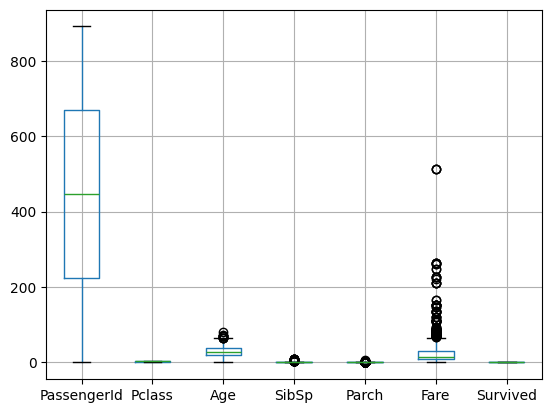

In [6]:
data.boxplot()
plt.show()

# Relação de sobreviventes com cada coluna

## Sobreviventes por sexo

In [7]:
sobreviventes = data.groupby("Sex")["Survived"].sum()
sobreviventes

Sex
female    233
male      109
Name: Survived, dtype: int64

In [8]:
contagem_sexo = data["Sex"].value_counts()
contagem_sexo

Sex
male      577
female    314
Name: count, dtype: int64

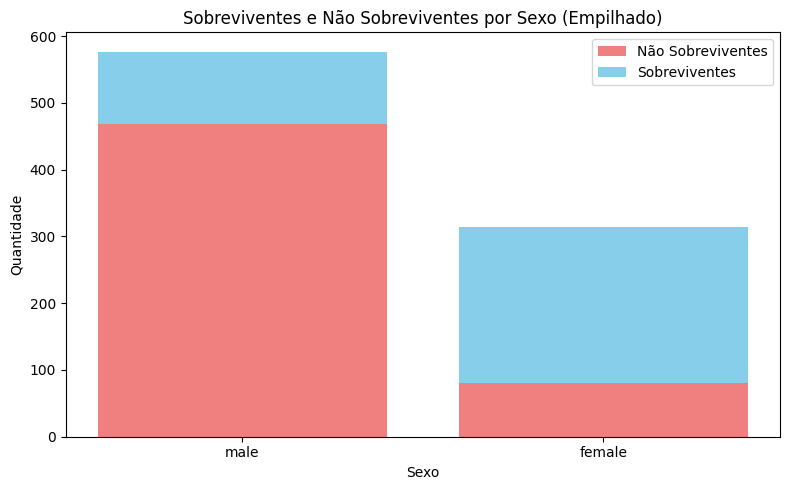

In [9]:
ordem = contagem_sexo.index
sobreviventes = data.groupby("Sex")["Survived"].sum().reindex(ordem)
nao_sobreviventes = contagem_sexo - sobreviventes

##Plot
plt.figure(figsize=(8, 5))
plt.bar(ordem, nao_sobreviventes, label='Não Sobreviventes', color='lightcoral')
plt.bar(ordem, sobreviventes, bottom=nao_sobreviventes, label='Sobreviventes', color='skyblue')
plt.title("Sobreviventes e Não Sobreviventes por Sexo (Empilhado)")
plt.xlabel("Sexo")
plt.ylabel("Quantidade")
plt.legend()
plt.tight_layout()
plt.show()


## Sobreviventes por classe

In [10]:
sobreviventes = data.groupby("Pclass")["Survived"].sum()
sobreviventes

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [11]:
contagem_classe = data["Pclass"].value_counts()
contagem_classe

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

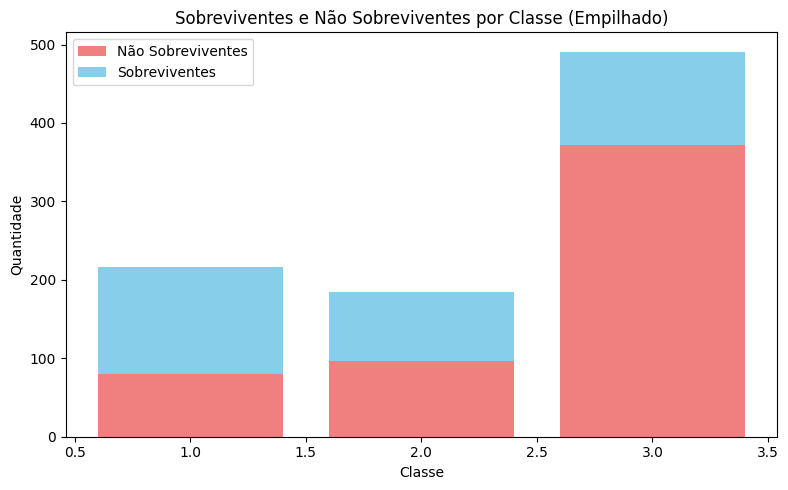

In [12]:
ordem = contagem_classe.index
sobreviventes = data.groupby("Pclass")["Survived"].sum().reindex(ordem)
nao_sobreviventes = contagem_classe - sobreviventes

##Plot
plt.figure(figsize=(8, 5))
plt.bar(ordem, nao_sobreviventes, label='Não Sobreviventes', color='lightcoral')
plt.bar(ordem, sobreviventes, bottom=nao_sobreviventes, label='Sobreviventes', color='skyblue')
plt.title("Sobreviventes e Não Sobreviventes por Classe (Empilhado)")
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.legend()
plt.tight_layout()
plt.show()

## Sobreviventes e parentesco

In [13]:
sobreviventes = data.groupby("SibSp")["Survived"].sum()
sobreviventes

SibSp
0    210
1    112
2     13
3      4
4      3
5      0
8      0
Name: Survived, dtype: int64

In [14]:
contagem_Sibsp = data["SibSp"].value_counts()
contagem_Sibsp

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

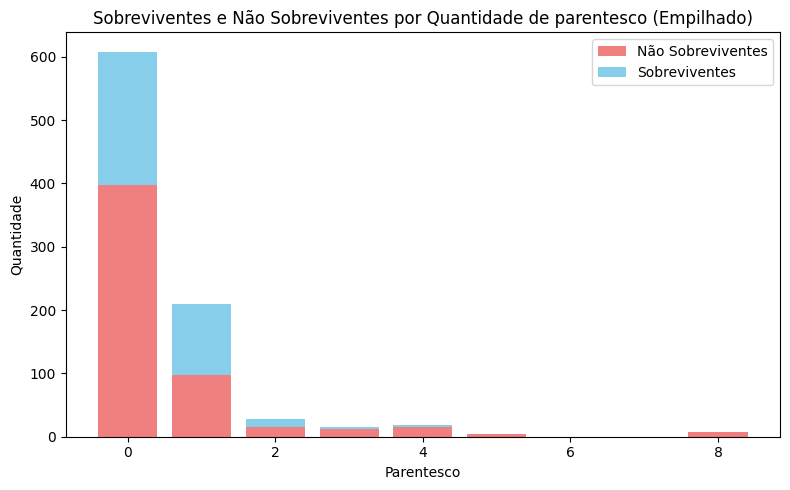

In [15]:
ordem = contagem_Sibsp.index
sobreviventes = data.groupby("SibSp")["Survived"].sum().reindex(ordem)
nao_sobreviventes = contagem_Sibsp - sobreviventes

##Plot
plt.figure(figsize=(8, 5))
plt.bar(ordem, nao_sobreviventes, label='Não Sobreviventes', color='lightcoral')
plt.bar(ordem, sobreviventes, bottom=nao_sobreviventes, label='Sobreviventes', color='skyblue')
plt.title("Sobreviventes e Não Sobreviventes por Quantidade de parentesco (Empilhado)")
plt.xlabel("Parentesco")
plt.ylabel("Quantidade")
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
sobreviventes = data.groupby("Parch")["Survived"].sum()
sobreviventes

Parch
0    233
1     65
2     40
3      3
4      0
5      1
6      0
Name: Survived, dtype: int64

In [17]:
contagem_Parch = data["Parch"].value_counts()
contagem_Parch

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

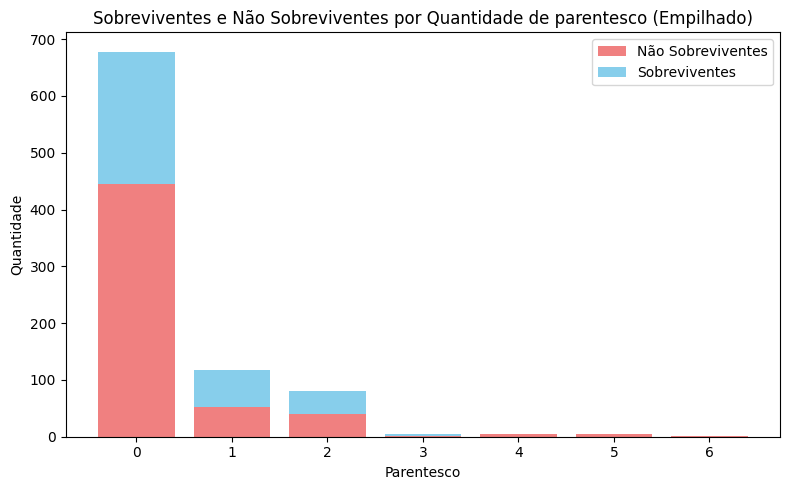

In [18]:
ordem = contagem_Parch.index
sobreviventes = data.groupby("Parch")["Survived"].sum().reindex(ordem)
nao_sobreviventes = contagem_Parch - sobreviventes

##Plot
plt.figure(figsize=(8, 5))
plt.bar(ordem, nao_sobreviventes, label='Não Sobreviventes', color='lightcoral')
plt.bar(ordem, sobreviventes, bottom=nao_sobreviventes, label='Sobreviventes', color='skyblue')
plt.title("Sobreviventes e Não Sobreviventes por Quantidade de parentesco (Empilhado)")
plt.xlabel("Parentesco")
plt.ylabel("Quantidade")
plt.legend()
plt.tight_layout()
plt.show()

## Distribuição de sobreviventes por idade

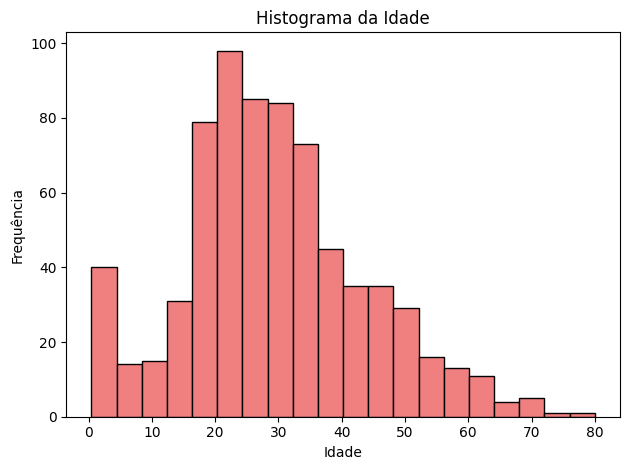

In [19]:
data["Age"].plot.hist(bins=20, edgecolor='black', color='lightcoral')
plt.title("Histograma da Idade")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

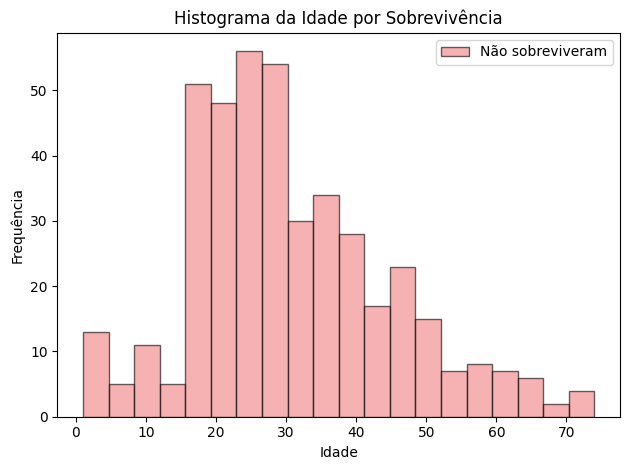

In [20]:
#Não Sobreviventes por idade
idades_sobreviveram = data[data["Survived"] == 1]["Age"].dropna()
idades_nao_sobreviveram = data[data["Survived"] == 0]["Age"].dropna()
plt.hist(idades_nao_sobreviveram, bins=20, alpha=0.6, label="Não sobreviveram", color="lightcoral", edgecolor="black")
plt.title("Histograma da Idade por Sobrevivência")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.legend()
plt.tight_layout()
plt.show()

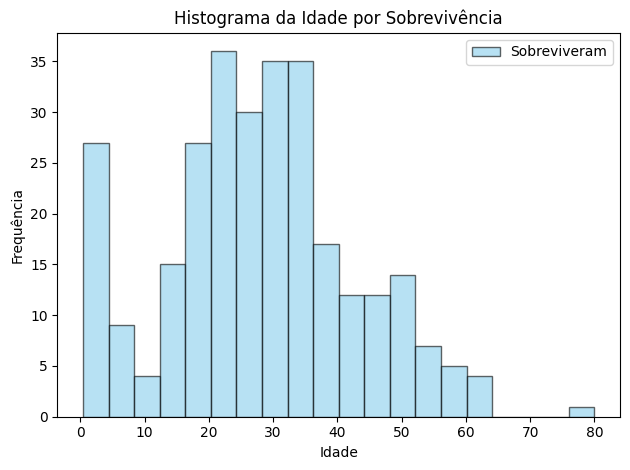

In [21]:
#Sobreviventes por idade
plt.hist(idades_sobreviveram, bins=20, alpha=0.6, label="Sobreviveram", color="skyblue", edgecolor="black")
plt.title("Histograma da Idade por Sobrevivência")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

## Fare x Sobreviventes

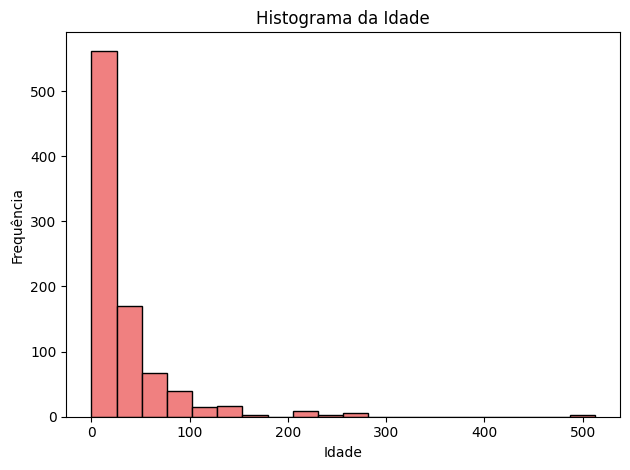

In [23]:
data["Fare"].plot.hist(bins=20, edgecolor='black', color='lightcoral')
plt.title("Histograma da Idade")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

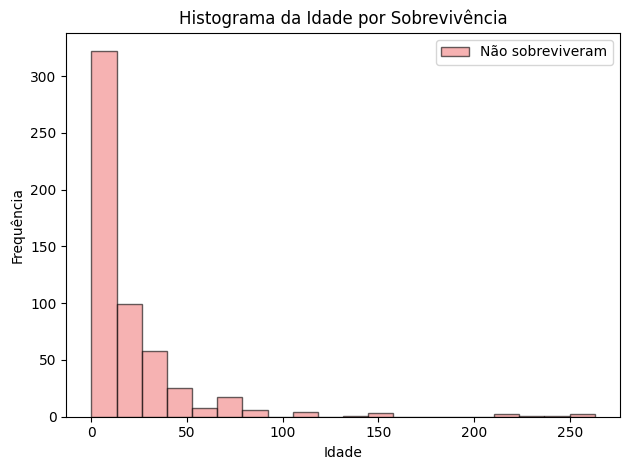

In [24]:
#Não Sobreviventes por idade
fare_sobreviveram = data[data["Survived"] == 1]["Fare"].dropna()
fare_nao_sobreviveram = data[data["Survived"] == 0]["Fare"].dropna()
plt.hist(fare_nao_sobreviveram, bins=20, alpha=0.6, label="Não sobreviveram", color="lightcoral", edgecolor="black")
plt.title("Histograma da Idade por Sobrevivência")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.legend()
plt.tight_layout()
plt.show()

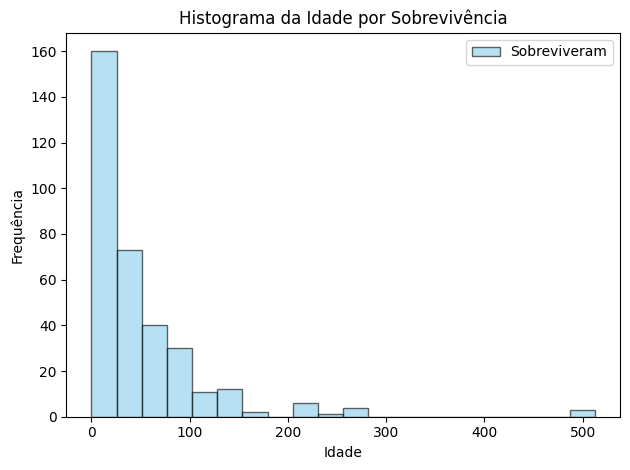

In [25]:
#Sobreviventes por Fare
plt.hist(fare_sobreviveram, bins=20, alpha=0.6, label="Sobreviveram", color="skyblue", edgecolor="black")
plt.title("Histograma da Idade por Sobrevivência")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.legend()
plt.tight_layout()
plt.show()

## Sosbreviventes x Local de embarque

In [26]:
sobreviventes = data.groupby("Embarked")["Survived"].sum()
sobreviventes

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64

In [27]:
contagem_Embarked = data["Embarked"].value_counts()
contagem_Embarked

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

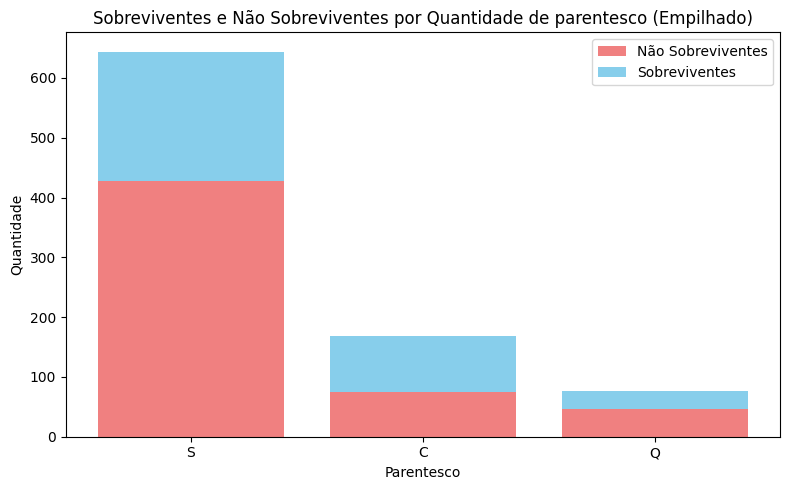

In [28]:
ordem = contagem_Embarked.index
sobreviventes = data.groupby("Embarked")["Survived"].sum().reindex(ordem)
nao_sobreviventes = contagem_Embarked - sobreviventes

##Plot
plt.figure(figsize=(8, 5))
plt.bar(ordem, nao_sobreviventes, label='Não Sobreviventes', color='lightcoral')
plt.bar(ordem, sobreviventes, bottom=nao_sobreviventes, label='Sobreviventes', color='skyblue')
plt.title("Sobreviventes e Não Sobreviventes por Quantidade de parentesco (Empilhado)")
plt.xlabel("Parentesco")
plt.ylabel("Quantidade")
plt.legend()
plt.tight_layout()
plt.show()

## Testes de correlação

In [29]:
##Transformar tabelas em numéricas
data = pd.get_dummies(data, columns=['Sex'], prefix='Sex')
data = pd.get_dummies(data, columns=['Embarked'], prefix='Embarked')

In [30]:
data["Embarked_C"] = data["Embarked_C"].map({True: 1, False: 0})
data["Embarked_Q"] = data["Embarked_Q"].map({True: 1, False: 0})
data["Embarked_S"] = data["Embarked_S"].map({True: 1, False: 0})
data["Sex_male"] = data["Sex_male"].map({True: 1, False: 0})
data["Sex_female"] = data["Sex_female"].map({True: 1, False: 0})

In [31]:
data = data.drop(columns = {"PassengerId", "Name", "Ticket", "Cabin"})

In [32]:
data

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,1,0,0,0,1
888,3,NaN,1,2,23.4500,0,1,0,0,0,1
889,1,26.0,0,0,30.0000,1,0,1,1,0,0


In [33]:
correlacoes = data.corr(method='pearson', numeric_only=True)

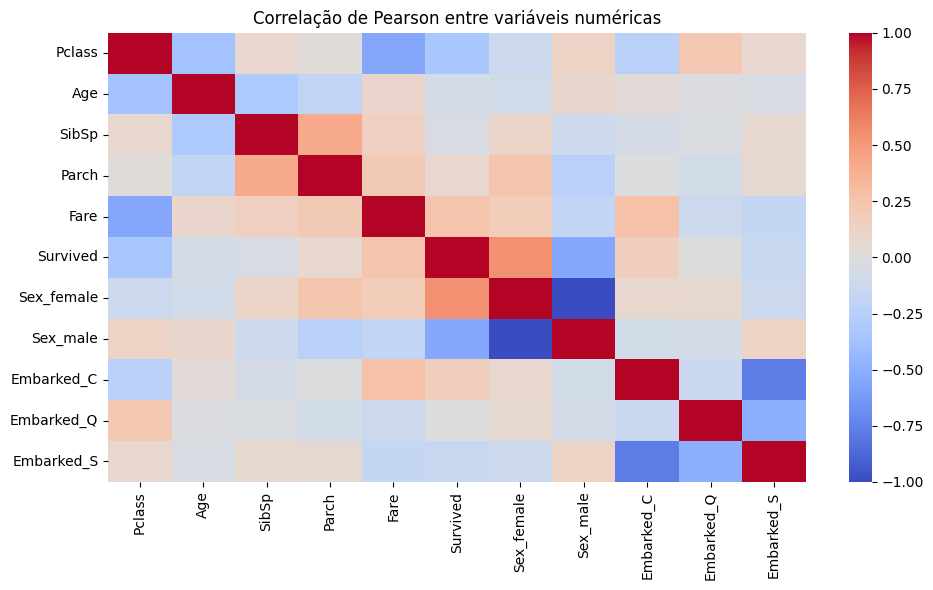

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlacoes, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlação de Pearson entre variáveis numéricas")
plt.tight_layout()
plt.show()

In [45]:
data.groupby(['Survived','Sex_male'])['Age'].describe()

count       mean        std   min    25%   50%    75%   max
Survived Sex_male                                                             
0        0          64.0  25.046875  13.618591  2.00  16.75  24.5  33.25  57.0
         1         360.0  31.618056  14.056019  1.00  21.75  29.0  39.25  74.0
1        0         197.0  28.847716  14.175073  0.75  19.00  28.0  38.00  63.0
         1          93.0  27.276022  16.504803  0.42  18.00  28.0  36.00  80.0

In [51]:
data.groupby(['Survived', 'Pclass'])['Age'].describe()

count       mean        std    min    25%    50%    75%   max
Survived Pclass                                                               
0        1        64.0  43.695312  15.284243   2.00  31.00  45.25  55.25  71.0
         2        90.0  33.544444  12.151581  16.00  25.00  30.50  39.00  70.0
         3       270.0  26.555556  12.334882   1.00  19.00  25.00  33.00  74.0
1        1       122.0  35.368197  13.760017   0.92  24.25  35.00  45.00  80.0
         2        83.0  25.901566  14.837787   0.67  17.50  28.00  34.00  62.0
         3        85.0  20.646118  11.995047   0.42  14.00  22.00  29.00  63.0